<a href="https://colab.research.google.com/github/MohitNaren/ML/blob/main/ml9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Simple Perceptron (basic code)**

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # Initialize weights and bias (weights[0] is the bias)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function for binary classification

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # Weighted sum + bias
        return self.activation(summation)

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                # Update weights and bias
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

# Example Usage (AND gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
y = np.array([0, 0, 0, 1])  # Output for AND gate

perceptron = Perceptron(input_size=2)
perceptron.fit(X, y)

for inputs in X:
    print(f"Input: {inputs}, Predicted: {perceptron.predict(inputs)}")


Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1


**2.Perceptron with activation Function with AND, OR (linear data), XOR (non linear data)**

In [2]:
import numpy as np

class PerceptronWithActivation:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # weights + bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function (activation function)

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # Weighted sum + bias
        return self.activation(summation)

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                # Update weights and bias
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

# AND Gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

perceptron_and = PerceptronWithActivation(input_size=2)
perceptron_and.fit(X_and, y_and)

# OR Gate
y_or = np.array([0, 1, 1, 1])

perceptron_or = PerceptronWithActivation(input_size=2)
perceptron_or.fit(X_and, y_or)

# XOR Gate (Needs more complex architecture than a Perceptron)
print("AND Gate Predictions:")
for inputs in X_and:
    print(f"Input: {inputs}, Predicted: {perceptron_and.predict(inputs)}")

print("\nOR Gate Predictions:")
for inputs in X_and:
    print(f"Input: {inputs}, Predicted: {perceptron_or.predict(inputs)}")


AND Gate Predictions:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 0
Input: [1 0], Predicted: 0
Input: [1 1], Predicted: 1

OR Gate Predictions:
Input: [0 0], Predicted: 0
Input: [0 1], Predicted: 1
Input: [1 0], Predicted: 1
Input: [1 1], Predicted: 1


**3.MLP with single hidden Layer (with various number of neurons)**

In [3]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Create data for classification
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input for XOR
y = np.array([0, 1, 1, 0])  # Output for XOR

# MLP with a single hidden layer (2 neurons in the hidden layer)
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000)
mlp.fit(X, y)

# Predictions
predictions = mlp.predict(X)
print("Predictions:", predictions)

# MLP with a single hidden layer (3 neurons in the hidden layer)
mlp_3_neurons = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000)
mlp_3_neurons.fit(X, y)

# Predictions
predictions_3_neurons = mlp_3_neurons.predict(X)
print("Predictions with 3 Neurons:", predictions_3_neurons)


Predictions: [0 1 0 1]
Predictions with 3 Neurons: [0 0 1 0]


**4.MLP on MNIST dataset and display its train and test data score.**

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load MNIST using tensorflow
mnist = tf.keras.datasets.mnist

# Load training and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing: Flatten the images and normalize
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten 28x28 to 784
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train / 255.0  # Normalize to [0, 1]
X_test = X_test / 255.0

# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10)
mlp.fit(X_train, y_train)

# Calculate accuracy
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

print(f"Train accuracy: {train_score}")
print(f"Test accuracy: {test_score}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Train accuracy: 0.9893166666666666
Test accuracy: 0.9753


**5. Find the relation between learning rate and loss (or) number  of iterations and loss.**

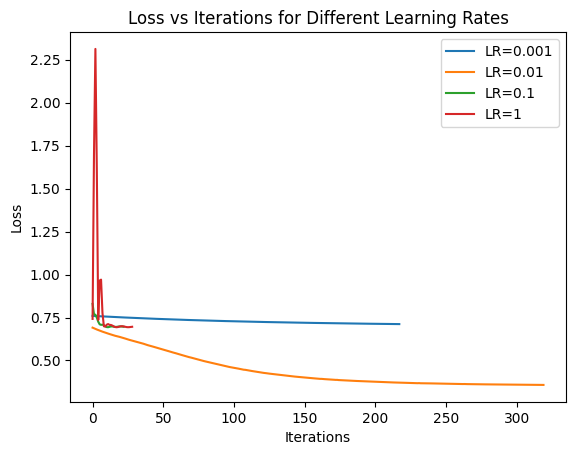

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Create data for classification
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input for XOR
y = np.array([0, 1, 1, 0])  # Output for XOR

learning_rates = [0.001, 0.01, 0.1, 1]
iterations = 1000
losses = []

for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=iterations, learning_rate_init=lr)
    mlp.fit(X, y)
    losses.append(mlp.loss_curve_)

# Plotting loss vs iterations for different learning rates
for i, lr in enumerate(learning_rates):
    plt.plot(losses[i], label=f"LR={lr}")

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Iterations for Different Learning Rates')
plt.show()


**6. Find the relation between number of neurons with learning rate and iterations.**

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


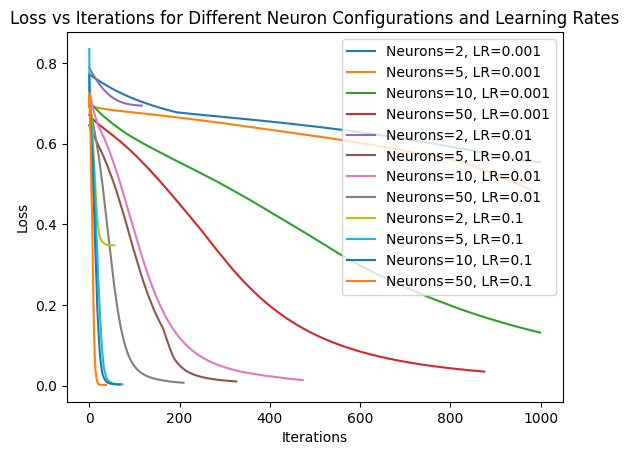

In [7]:
neurons = [2, 5, 10, 50]
learning_rates = [0.001, 0.01, 0.1]
iterations = 1000
losses = {}

for lr in learning_rates:
    for n in neurons:
        mlp = MLPClassifier(hidden_layer_sizes=(n,), max_iter=iterations, learning_rate_init=lr)
        mlp.fit(X, y)
        losses[(n, lr)] = mlp.loss_curve_

# Plotting loss vs iterations for different configurations
for (n, lr), loss in losses.items():
    plt.plot(loss, label=f"Neurons={n}, LR={lr}")

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Iterations for Different Neuron Configurations and Learning Rates')
plt.show()
